In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 7)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm


In [2]:
# Load the dataset
data = pd.read_csv('../../data/dataset/processed_datasets/feature_selection/resample_encoded_20_features.csv')

# Convert the dataset to a NumPy array for easier manipulation with clustering functions
X = data.values


In [3]:
y_true = data['HeartDisease_Yes'].values  # True labels for heart disease (binary)

In [4]:
X = data.drop(columns=['HeartDisease_Yes']) 


In [5]:
# PCA helps reduce high-dimensional data to 2D, which we can plot easily
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Transformed data in 2D space


In [6]:
# Fit the K-Means algorithm with a specified number of clusters (k) and predict clusters

# Set the number of clusters
k = 5
# Initialize the KMeans model with the specified number of clusters
kmeans = KMeans(n_clusters=k, n_init=10, random_state=47)
# Fit the KMeans model to the data and predict the clusters for each point
y_pred = kmeans.fit_predict(X)

# Print the coordinates of the cluster centers in the original feature space
print("Cluster Centers (in original feature space):")
print(kmeans.cluster_centers_)


c:\Users\ilham\anacondapy\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ilham\anacondapy\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Cluster Centers (in original feature space):
[[2.58101226e+00 1.30935328e-01 1.76534564e-01 7.91553929e-01
  1.74571595e-01 6.32924824e-02 1.28335721e-01 4.54612977e-01
  5.03209719e-02 4.52809168e-02 3.76677808e-02 4.65011406e-02
  4.17794047e-02 7.71712027e-01 1.02551860e-01 1.27407290e-01
  1.27937822e-01 4.83049499e-02 5.45546183e-01 5.19656215e-02]
 [1.12139504e+00 6.00268276e-01 3.56136821e-01 6.08316566e-01
  2.13058350e+01 1.94500335e-01 1.44198524e-01 6.02951040e-01
  1.53588196e-01 1.54258887e-02 1.07310530e-02 2.95103957e-02
  1.60965795e-02 4.90274983e-01 9.12139504e-02 1.57612341e-01
  1.30784708e-01 3.68879946e-02 4.23205902e-01 4.76190476e-02]
 [1.47155392e+00 4.64477781e-01 3.20124540e-01 6.45909992e-01
  1.27684687e+01 1.55675064e-01 1.29068780e-01 5.60147184e-01
  1.35861874e-01 2.00962355e-02 1.81149165e-02 2.85876026e-02
  2.60401925e-02 5.96377017e-01 1.18596094e-01 1.40390603e-01
  1.36711010e-01 3.82111520e-02 4.60515143e-01 4.89668837e-02]
 [7.94867758e-01 6.816

c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


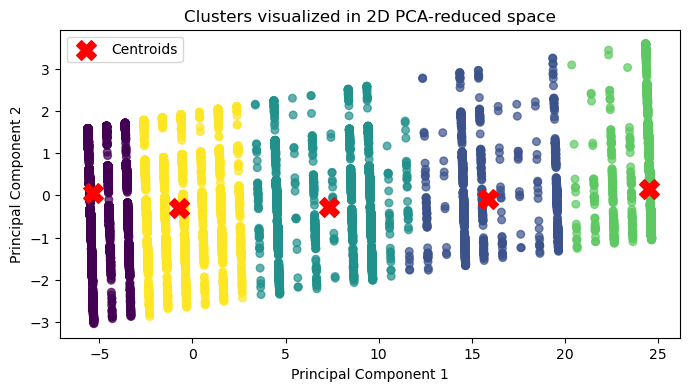

In [7]:
# Visualize the clusters in 2D PCA-reduced space
# This helps us see the clusters even if we have reduced data dimensionality

# Plotting the clusters
plt.figure(figsize=(8, 4))
# Scatter plot of the data points colored by cluster assignments
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, s=30, cmap='viridis', alpha=0.7)
# Plot the centroids (transformed to 2D PCA space)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters visualized in 2D PCA-reduced space")
plt.legend()
plt.show()


In [8]:
# We test different numbers of clusters to find the optimal number
range_n_clusters = [2, 3, 4, 5, 6]

# Loop through each number of clusters
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")


For n_clusters = 2, the average silhouette_score is : 0.8111042088758147
For n_clusters = 3, the average silhouette_score is : 0.751167311596544
For n_clusters = 4, the average silhouette_score is : 0.6166397558081107
For n_clusters = 5, the average silhouette_score is : 0.5309500233304234
For n_clusters = 6, the average silhouette_score is : 0.2964927689126671


For n_clusters = 2, the average silhouette_score is : 0.8111042088758147


c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature nam

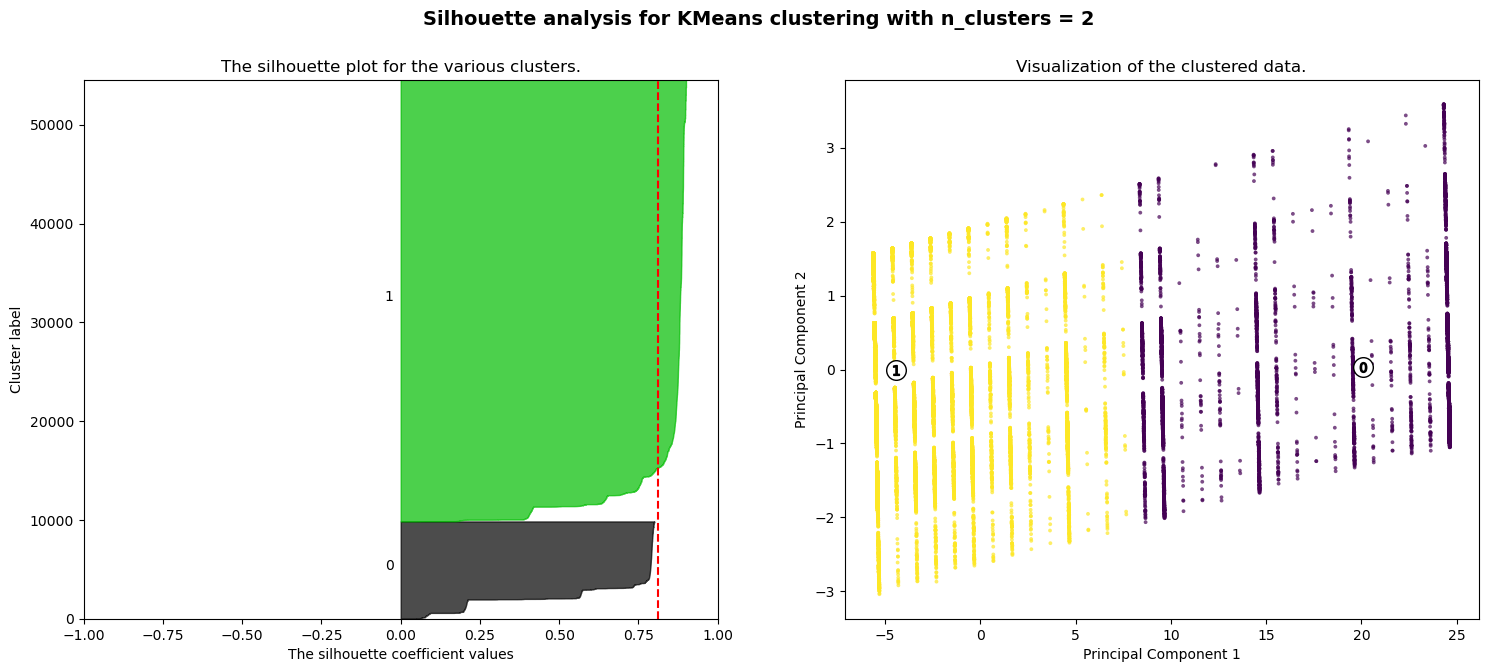

For n_clusters = 3, the average silhouette_score is : 0.751167311596544


c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature nam

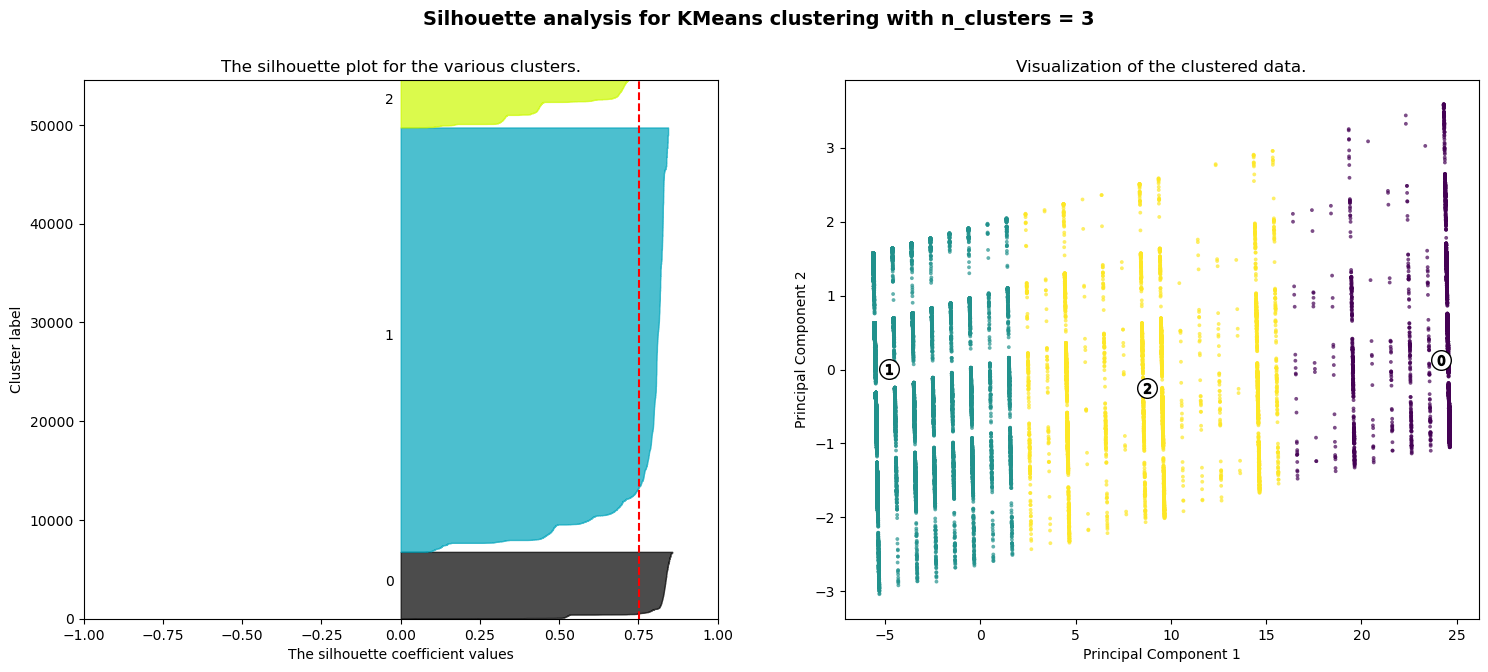

For n_clusters = 4, the average silhouette_score is : 0.6166397558081107


c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature nam

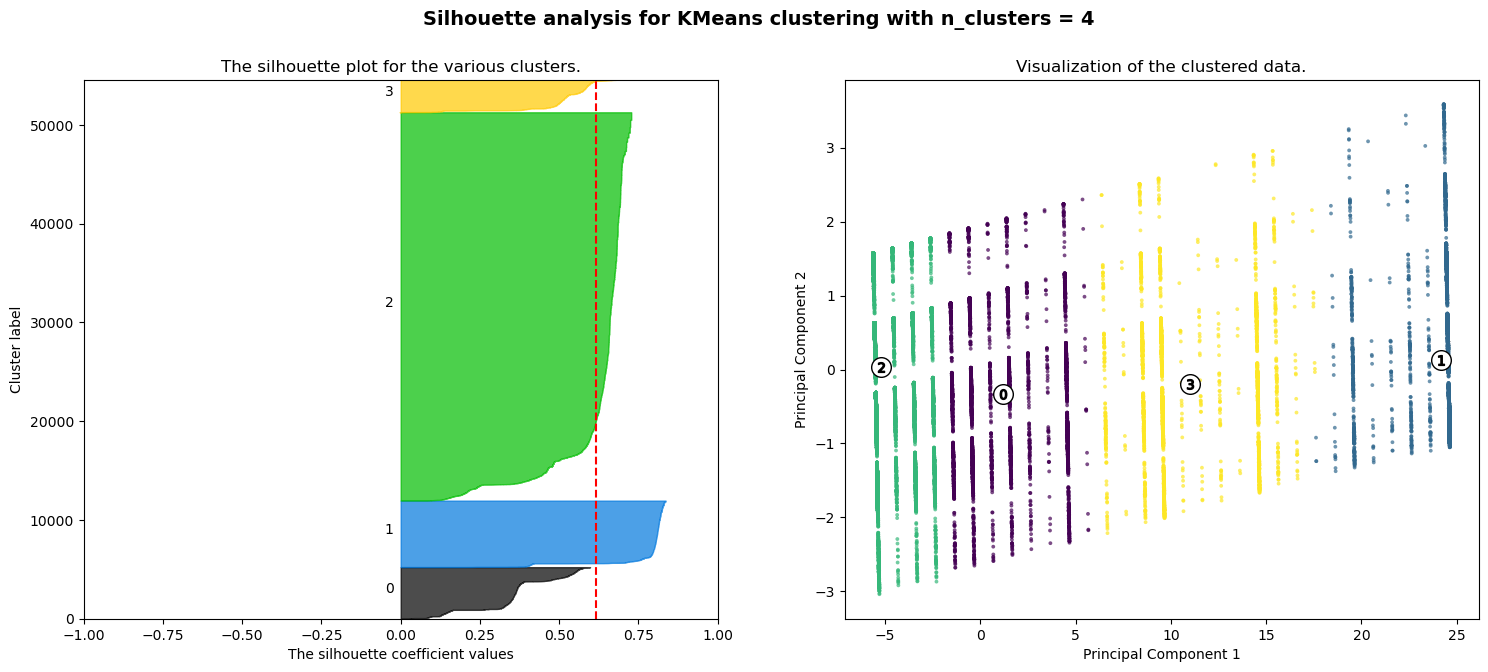

For n_clusters = 5, the average silhouette_score is : 0.5309500233304234


c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature nam

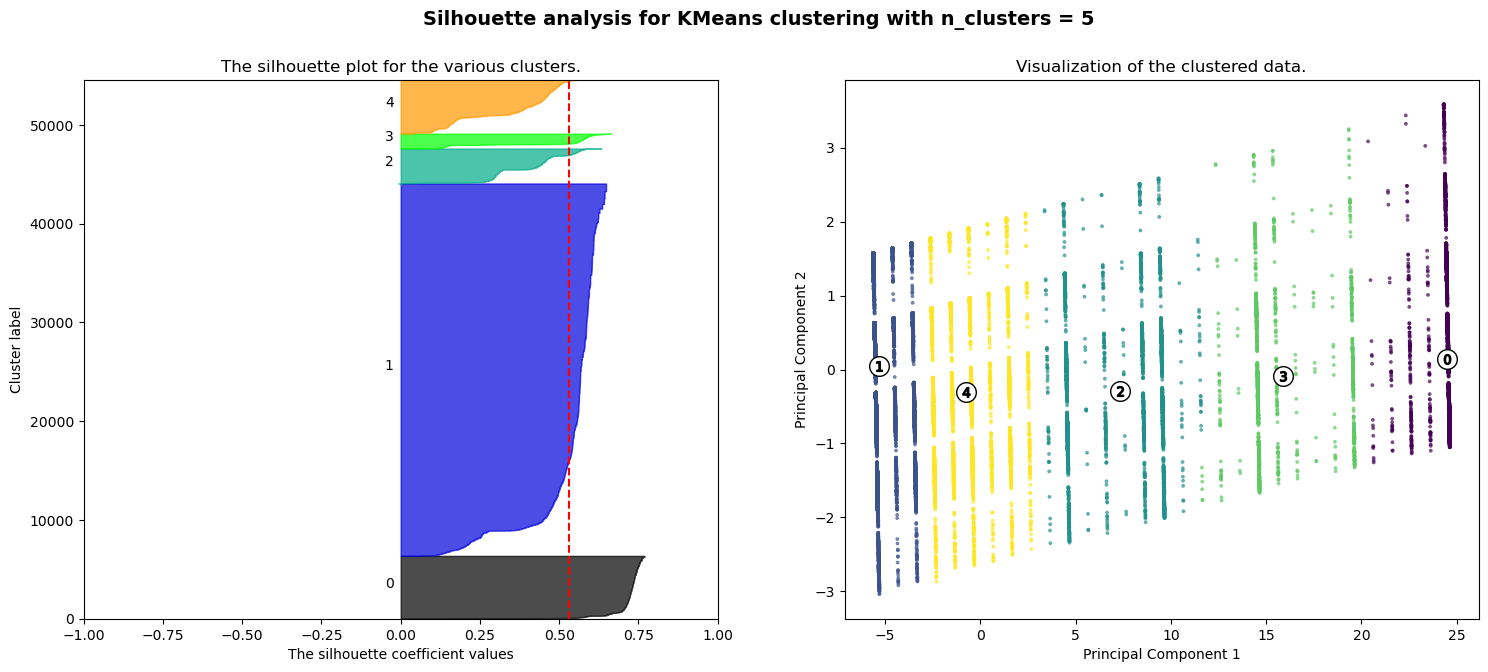

For n_clusters = 6, the average silhouette_score is : 0.2964927689126671


c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\ilham\anacondapy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature nam

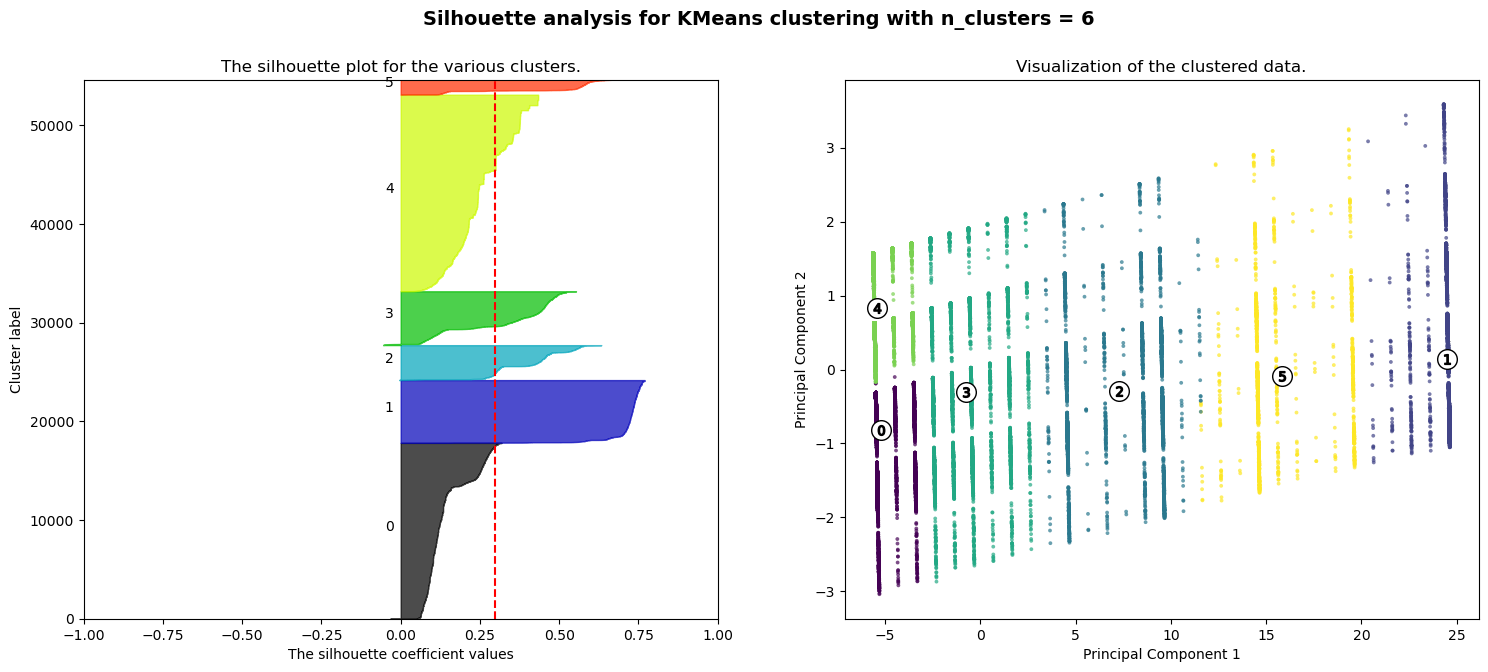

In [9]:
# Detailed silhouette analysis for each number of clusters
# The silhouette plot shows how close points in one cluster are to points in neighboring clusters.

# Loop through each number of clusters
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Configure the silhouette plot
    ax1.set_xlim([-1, 1])  # The silhouette coefficient range
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])  # The number of samples and clusters

    # we initialize the KMeans model and fit to the data
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # we calculate the average silhouette score for all samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    # we get the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10  # Start position for the silhouette plot
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]  # Number of samples in ith cluster
        y_upper = y_lower + size_cluster_i  # End position for the ith cluster

        # Color and plot the silhouette values
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label silhouette plots with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Update the starting position for the next cluster
        y_lower = y_upper + 10  # 10 for the space between clusters

    # Plot configuration for silhouette plot
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")  # Average silhouette score line

    # 2nd Plot showing the actual clusters in PCA-reduced space
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=cluster_labels, cmap='viridis', edgecolor='k')
    
    # Draw white circles at cluster centers (transformed to PCA space)
    centers = clusterer.cluster_centers_
    ax2.scatter(pca.transform(centers)[:, 0], pca.transform(centers)[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    # we label the cluster centers with numbers
    for i, c in enumerate(centers):
        ax2.scatter(pca.transform(c.reshape(1, -1))[:, 0], pca.transform(c.reshape(1, -1))[:, 1],
                    marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    # we plot the configuration for cluster visualization
    ax2.set_title("Visualization of the clustered data.")
    ax2.set_xlabel("Principal Component 1")
    ax2.set_ylabel("Principal Component 2")

    # title
    plt.suptitle(f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}",
                 fontsize=14, fontweight='bold')
    plt.show()


In [10]:
from sklearn.metrics import confusion_matrix

# Apply KMeans with 2 clusters
kmeans_2 = KMeans(n_clusters=2, n_init=10, random_state=47)
y_pred_2_clusters = kmeans_2.fit_predict(X)

#  True labels from the dataset (assuming the target is the column `HeartDisease_Yes`)
true_labels = data['HeartDisease_Yes'].values  # 1 = Yes heart disease, 0 = No heart disease

# we create a confusion matrix to see how the clusters align with the true labels
conf_matrix_2 = confusion_matrix(true_labels, y_pred_2_clusters)
print("Confusion Matrix (2 clusters):")
print(conf_matrix_2)

# calculating purity for each cluster
cluster_A_purity = conf_matrix_2[0, 0] / (conf_matrix_2[0, 0] + conf_matrix_2[0, 1]) if conf_matrix_2[0, 0] + conf_matrix_2[0, 1] > 0 else 0
cluster_B_purity = conf_matrix_2[1, 1] / (conf_matrix_2[1, 0] + conf_matrix_2[1, 1]) if conf_matrix_2[1, 0] + conf_matrix_2[1, 1] > 0 else 0

print(f"Cluster A Purity: {cluster_A_purity:.2f}")
print(f"Cluster B Purity: {cluster_B_purity:.2f}")

# overall clustering accuracy based on dominant labels in each cluster
dominant_labels = np.argmax(conf_matrix_2, axis=1)
accuracy_2_clusters = np.sum(conf_matrix_2[i, dominant_labels[i]] for i in range(len(conf_matrix_2))) / np.sum(conf_matrix_2)

print(f"Clustering accuracy with 2 clusters: {accuracy_2_clusters:.2f}")


Confusion Matrix (2 clusters):
[[24614  2647]
 [20073  7188]]
Cluster A Purity: 0.90
Cluster B Purity: 0.26
Clustering accuracy with 2 clusters: 0.82


C:\Users\ilham\AppData\Local\Temp\ipykernel_30056\2508432236.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  accuracy_2_clusters = np.sum(conf_matrix_2[i, dominant_labels[i]] for i in range(len(conf_matrix_2))) / np.sum(conf_matrix_2)


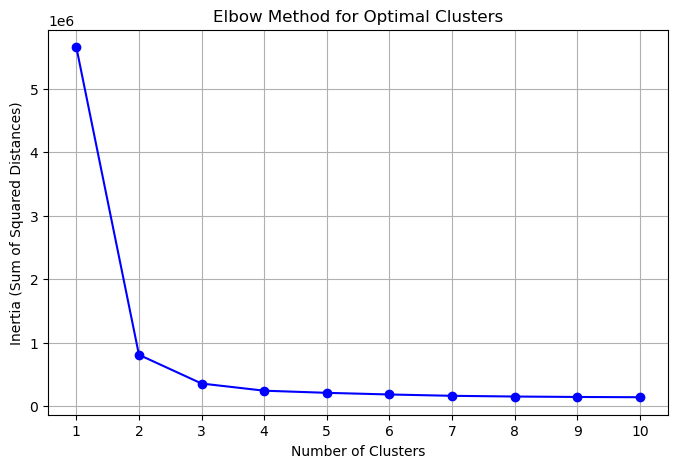

In [11]:
# Elbow Method to determine the optimal number of clusters 
inertia_values = []
range_n_clusters = range(1, 11)  # We try from 1 to 10 clusters

# Loop through each cluster number
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
    kmeans.fit(X)  
    inertia_values.append(kmeans.inertia_)  

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia_values, 'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal Clusters")
plt.grid()
plt.xticks(range(1, 11))  
plt.show()
